# performing on cleaned data with 2k positive and 2k negative points

In [1]:
import pandas as pd
import numpy as np
import sqlite3
conn=sqlite3.connect(r'''C:\Users\akash\ML\AMAZON\newData.sqlite''')

In [2]:
data=pd.read_sql("SELECT * FROM Reviews ",conn)

In [3]:
positive=data[data.Score == "positive"]

In [4]:
negative=data[data.Score=="negative"]

In [5]:
positive=positive.head(100)
negative=negative.head(100)

In [6]:
data=pd.concat([positive,negative],axis=0,sort=False)

In [14]:
type(data)

pandas.core.frame.DataFrame

In [23]:
label=data["Score"]

In [24]:
label.shape

(200,)

# BOW

## converting data(string form) into vector form

In [7]:
#unigram
from sklearn.feature_extraction.text import CountVectorizer
countvect=CountVectorizer(max_features=50)
final=countvect.fit_transform(data["cleanedText"].values)

# standardizing the data

In [8]:
from sklearn.preprocessing import StandardScaler
standardData=StandardScaler().fit_transform(final.toarray())

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
standardData.shape

(200, 50)

## building tsne model with default values(perplexity =30,iteration =200)

In [10]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2)
tsne_data=model.fit_transform(standardData)

In [11]:
tsne_data.shape

(200, 2)

In [22]:
label.shape

(200,)

In [ ]:
np.vstack((tsne_data))

In [90]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(standardData)
import numpy as np
tsne_data=np.vstack((tsne_data.T,label)).T


In [91]:
tsne_data.shape

(4000, 3)

In [92]:
import pandas as pd
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


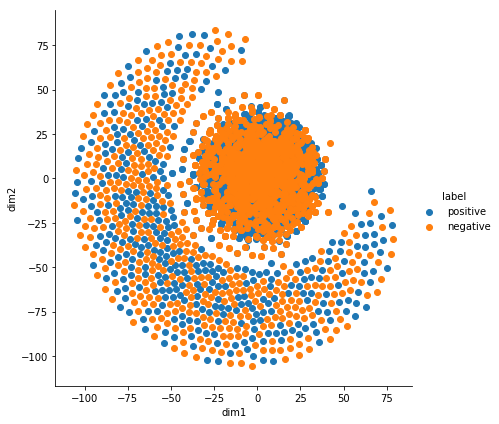

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(data=df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
nothing is clear for default perplexity.extremely mixed up

## Buliding the TSNE model with perplexity 100

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


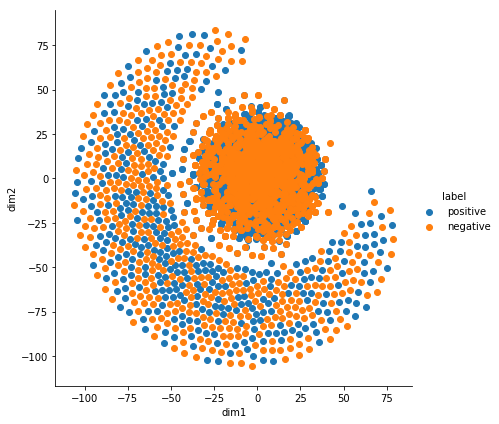

In [94]:
model=TSNE(n_components=2,random_state=0,perplexity=100,n_iter=1000)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
no change on increasing perplexity and iterations

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


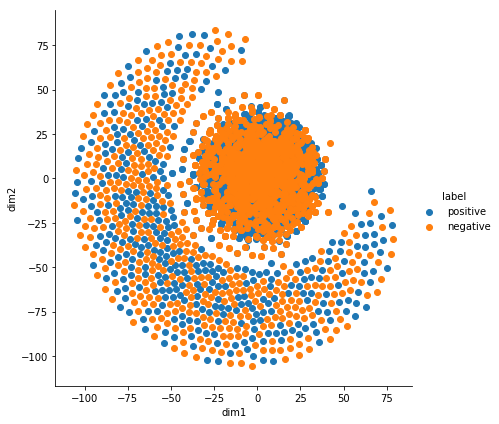

In [95]:
model=TSNE(n_components=2,random_state=0,perplexity=500,n_iter=2000)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
same results

# Buliding the TSNE model with perplexity 1000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


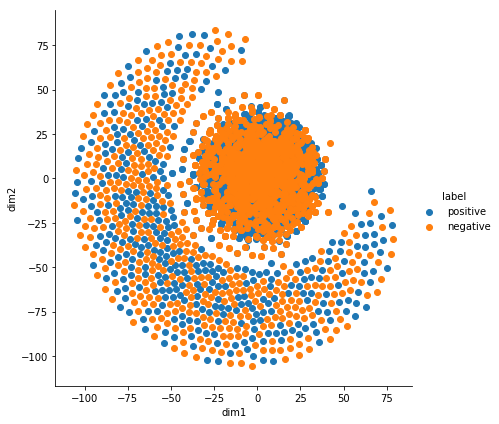

In [96]:
model=TSNE(n_components=2,random_state=0,perplexity=1000,n_iter=4000)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
there is no change seen in either of the figure.

# Buliding the TSNE model with perplexity 2000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


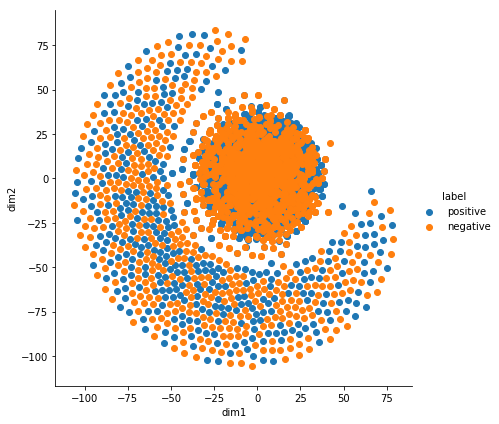

In [97]:
model=TSNE(n_components=2,random_state=0,perplexity=2000,n_iter=4000)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
there is no change seen in either of the figure.BOW didnt helped to differentiate 
between positive and negative words.

# TFIDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data["cleanedText"].values)

In [9]:
type(X)

scipy.sparse.csr.csr_matrix

In [10]:
from sklearn.preprocessing import StandardScaler
standardData=StandardScaler().fit_transform(X.toarray())

In [11]:
type(standardData)

numpy.ndarray

In [12]:
features=vectorizer.get_feature_names()

In [103]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(standardData)
import numpy as np
tsne_data=np.vstack((tsne_data.T,label)).T

In [104]:
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


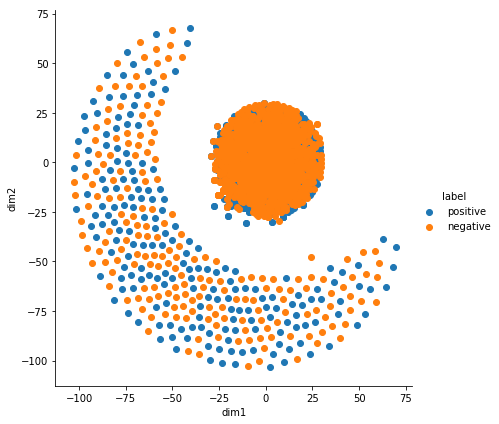

In [105]:
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
no conclusion could be derived.some points are scattered and some(from both labels) is centred at same region

# for perplexity 500 & iter =2000

In [106]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0,n_iter=2000,perplexity=500)
tsne_data=model.fit_transform(standardData)

In [107]:
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


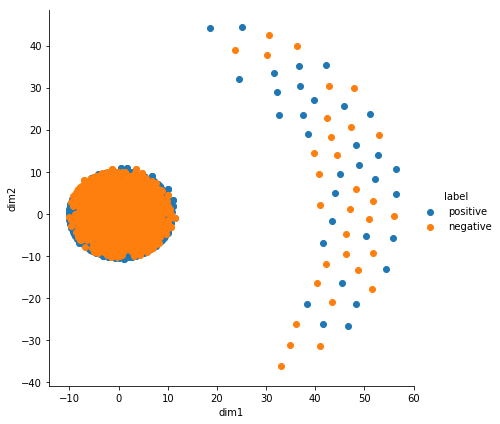

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()

# observation:
similar thing happened with this graph too.

# for perplexity 500 and 4000 iter

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


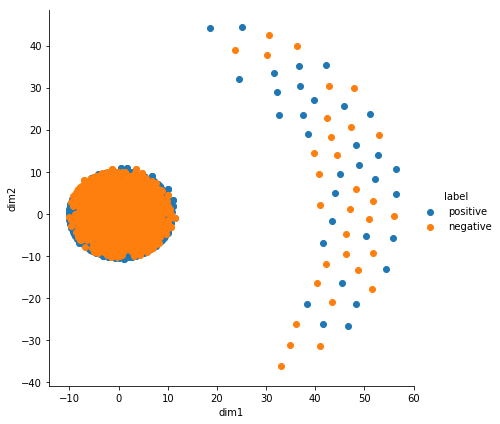

In [109]:
model=TSNE(n_components=2,random_state=0,n_iter=4000,perplexity=500)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
no change is seen on incresing the no. of iterations.graph remains the same

# for perplexity 1000 and 4000 iter

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


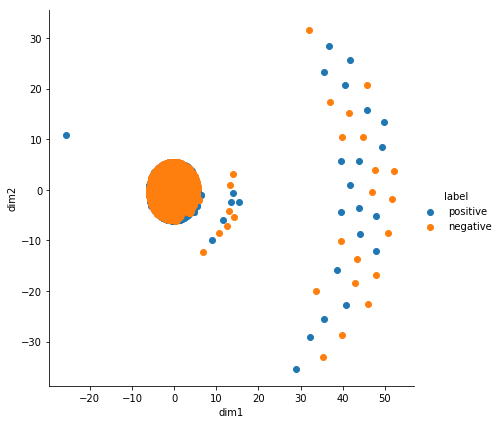

In [25]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
model=TSNE(n_components=2,random_state=0,n_iter=4000,perplexity=1000)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
no conclusion could be drawn.the centred region became small on increasing the perplexity

# for perplexity 1000 and 4000 iter

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


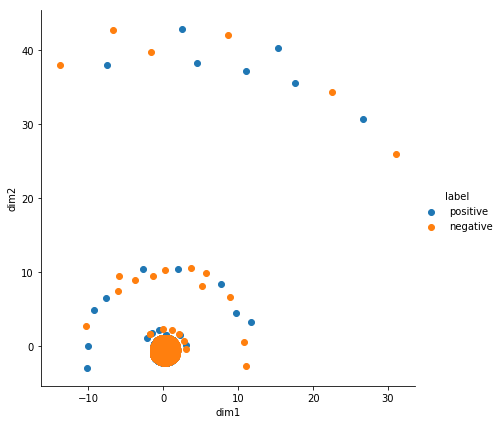

In [15]:
model=TSNE(n_components=2,random_state=0,n_iter=4000,perplexity=2000)
tsne_data=model.fit_transform(standardData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
no conclusion.centred region is becoming more and more smaller on increasing perplexity

# Word2Vector

In [16]:
#https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [17]:
from gensim.models import Word2Vec
#model=keyedVectors.load_word2Vec_format("")
Lstw2v=[]
for val in data["cleanedText"].values:
    Lstw2v.append(val.split())

In [19]:
w2vmodel=Word2Vec(Lstw2v,size=50,min_count=5,workers=4)

In [20]:
type(w2vmodel)

gensim.models.word2vec.Word2Vec

In [21]:
words=list(w2vmodel.wv.vocab)

In [22]:
w2vVectors=w2vmodel[words]

/home/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


## separating as positive and negative

In [26]:

i=0
allPositiveWords=[]
allNegativeWords=[]
for sent in data["cleanedText"].values:
    for word in sent.split():
        if(data["Score"].values)[i]=="positive":
            allPositiveWords.append(word)
        if(data["Score"].values)[i]=="negative":
                allNegativeWords.append(word)
    i+=1

In [27]:
posSet=set(allPositiveWords)
negSet=set(allNegativeWords)

In [28]:
dta2=[]
for word in words:
    if (word in posSet):
        dta2.append("positive")
    else:
        dta2.append("negative")
   

In [30]:
import pandas as pd
ulabel=pd.Series(dta2)

In [31]:
w2vVectors.shape

(3184, 50)

# standardizing the data

In [32]:
from sklearn.preprocessing import StandardScaler
standardScalar=StandardScaler()
stdData=standardScalar.fit_transform(w2vVectors)

In [33]:
stdData.shape

(3184, 50)

# reducing the dimensions with TSNE

In [34]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0,perplexity=200,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


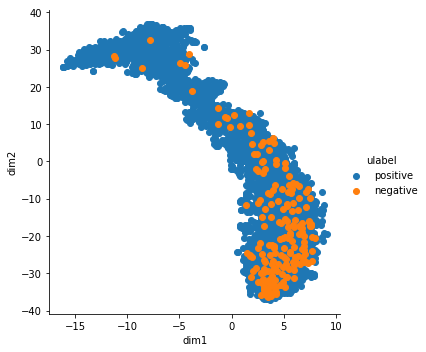

In [35]:
Tsne_data=np.vstack((tsne_data.T,ulabel)).T
df=pd.DataFrame(Tsne_data,columns=["dim1","dim2","ulabel"])
sns.FacetGrid(df,hue="ulabel",size=5).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# perlplexity 300

In [36]:
tsne=TSNE(n_components=2,perplexity=300,n_iter=2000)
tsne_data=tsne.fit_transform(stdData)
Tsne_data=np.vstack((tsne_data.T,ulabel)).T

In [37]:
df=pd.DataFrame(Tsne_data,columns=["dim1","dim2","ulabel"])

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


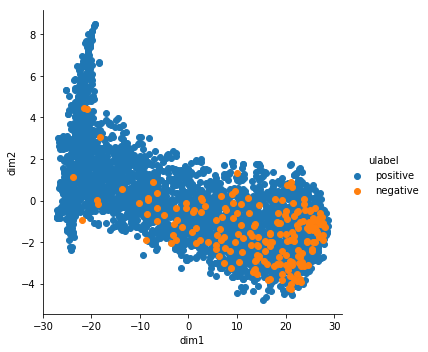

In [38]:
sns.FacetGrid(df,hue="ulabel",size=5).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
clearly the positive became the majority point and labels are extremely overlapping

# perplexity 500

In [41]:
tsne=TSNE(n_components=2,perplexity=500,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
Tsne_data=np.vstack((tsne_data.T,ulabel)).T

In [42]:
df=pd.DataFrame(Tsne_data,columns=["dim1","dim2","ulabel"])

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


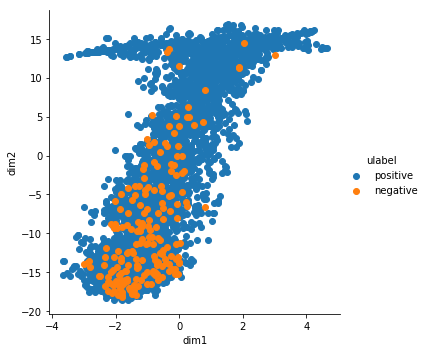

In [43]:
sns.FacetGrid(df,hue="ulabel",size=5).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
extremely overlapping. no results could be obtained.

# perplexity 1000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


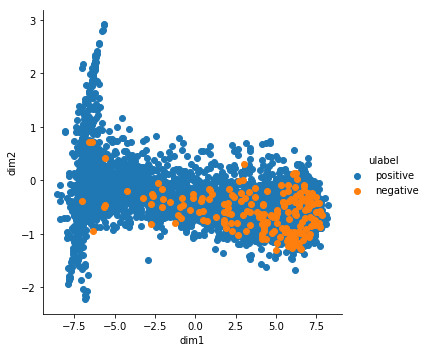

In [45]:
tsne=TSNE(n_components=2,perplexity=1000,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
Tsne_data=np.vstack((tsne_data.T,ulabel)).T
df=pd.DataFrame(Tsne_data,columns=["dim1","dim2","ulabel"])
sns.FacetGrid(df,hue="ulabel",size=5).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
just change in  shape of plot.still extremely overlapping

# perplexity 2000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


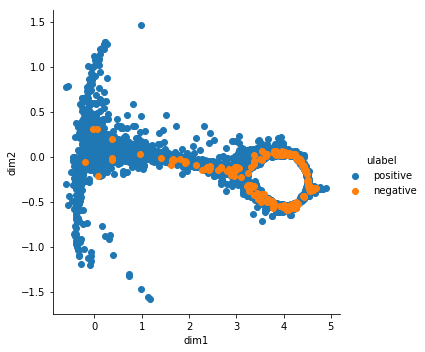

In [46]:
tsne=TSNE(n_components=2,perplexity=2000,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
Tsne_data=np.vstack((tsne_data.T,ulabel)).T
df=pd.DataFrame(Tsne_data,columns=["dim1","dim2","ulabel"])
sns.FacetGrid(df,hue="ulabel",size=5).map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
just change in  shape of plot.still extremely overlapping

# overall:
no conclusion. unigram cant help us in this as max similar words are present in both positive and negative words

# AVGW2V

In [47]:

sent_vectors = []; 
for sent in Lstw2v:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent:
        if word in words:
            vec = w2vmodel.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [48]:
print(sent_vectors[0])

[ 0.11646831  0.48387446 -0.13006684 -0.14971265  0.14900127 -0.24349446
  0.16171275 -0.53035807 -0.05232462  0.07057778  0.27034898  0.34116993
 -0.21829854 -0.087228   -0.65551528  0.44923414 -0.10941457  0.46242241
  0.52467047  0.30880849 -0.44315504 -0.4978206   0.23551918  0.01003467
  0.20761358 -0.24840778  0.47120055  0.16986513 -0.11884766 -0.07808605
 -0.33222453  0.22152133  0.09205901  0.07412442 -0.03965949 -0.29087678
 -0.12937532  0.38501927  0.37567065 -0.56005396  0.1896444  -0.26314331
  0.21231708  0.02806051  0.2683249   0.1573742  -0.28553278 -0.11945754
 -0.48390326  0.10593214]


In [49]:
type(sent_vectors)

list

In [50]:
standardScalar=StandardScaler()
stdData=standardScalar.fit_transform(sent_vectors)

In [51]:
stdData.shape

(4000, 50)

In [52]:
tsne=TSNE(n_components=2,perplexity=200,n_iter=2000)
tsne_data=tsne.fit_transform(stdData)

In [53]:
label=data["Score"]

In [54]:
tsne_data.shape

(4000, 2)

# plotting with default parameters

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


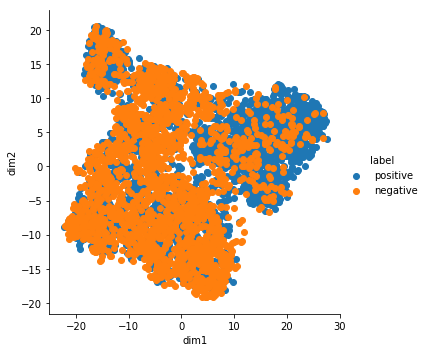

In [55]:
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

## observation:
extremely overlapping

# perplexity 500

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


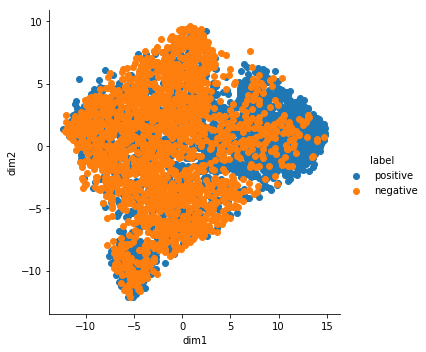

In [57]:
tsne=TSNE(n_components=2,perplexity=500,n_iter=3000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
same results with this observation too.little change in shape of graph.but extremely overlapping

# perplexity 1000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


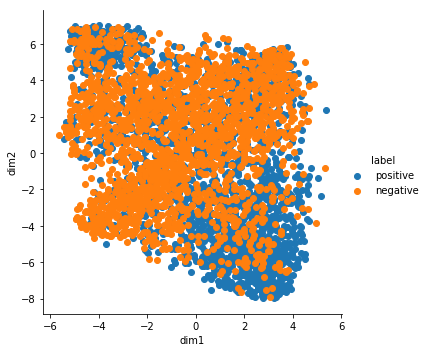

In [58]:
tsne=TSNE(n_components=2,perplexity=1000,n_iter=3000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
same results with this observation too.little change in shape of graph.but extremely overlapping

# perplexity 2000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


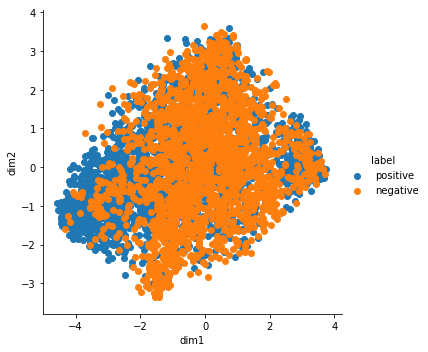

In [59]:
tsne=TSNE(n_components=2,perplexity=2000,n_iter=2000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
same results with this observation too.little change in shape of graph.but extremely overlapping

# perplexity 2500

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


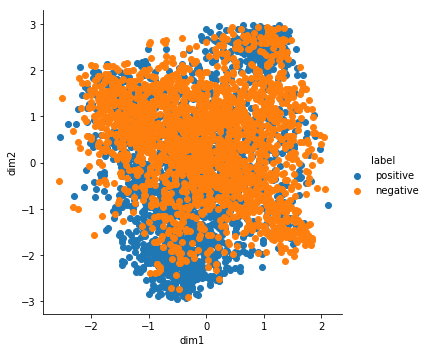

In [60]:
tsne=TSNE(n_components=2,perplexity=2500,n_iter=2000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
same results with this observation too.no change on increaing perplexity

# AVGW2V tfidf

In [61]:
type(vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [62]:
feature=vectorizer.get_feature_names()

In [63]:
row=0
tfidfF=[]
for sent in Lstw2v:
    senV=np.zeros(50)
    weight=0
    for word in sent:
        if word in words:
            vec=w2vmodel.wv[word]
            tfidf=X[row,feature.index(word)]
            senV=(vec*tfidf)
            weight+=tfidf
    if (weight!=0):
        senV /= weight
    tfidfF.append(senV)
    row+=1
    

In [64]:
standardScalar=StandardScaler()
stdData=standardScalar.fit_transform(tfidfF)

In [65]:
stdData.shape

(4000, 50)

In [66]:
label.shape

(4000,)

# plotting with perplexity 200

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


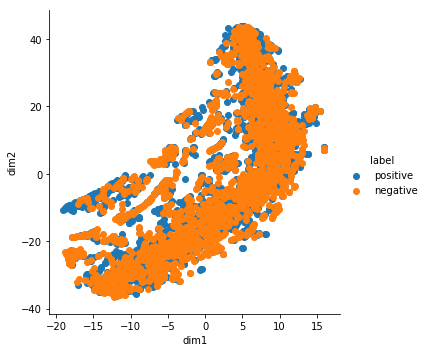

In [67]:
tsne=TSNE(n_components=2,perplexity=200,n_iter=2000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
extremely overlapping of positive and negative

# perplexity 500

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


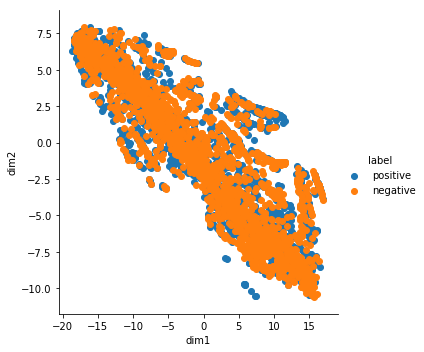

In [68]:
tsne=TSNE(n_components=2,perplexity=500,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
little change in figure but labels are still extremely overlapping

# perplexity 1000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


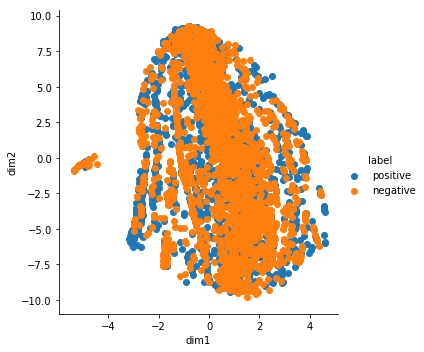

In [69]:
tsne=TSNE(n_components=2,perplexity=1000,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
little change in fig but no conclusion could be drawn

# perplexity 1500

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


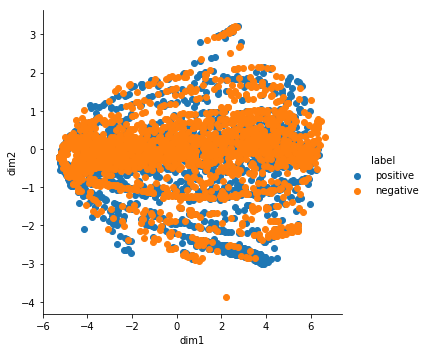

In [70]:
tsne=TSNE(n_components=2,perplexity=1500,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
no change in fig.no conclusion

# perplexity 2000

/home/akash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


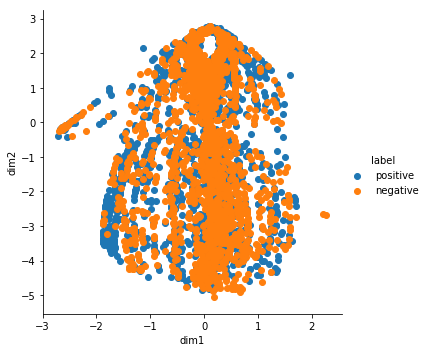

In [71]:
tsne=TSNE(n_components=2,perplexity=2000,n_iter=4000)
tsne_data=tsne.fit_transform(stdData)
tsne_data=np.vstack((tsne_data.T,label)).T
df=pd.DataFrame(tsne_data,columns=["dim1","dim2","label"])
sns.FacetGrid(df,size=5,hue="label").map(plt.scatter,"dim1","dim2").add_legend()
plt.show()

# observation:
cant differentiate between pos. and neg. labels

# OVERALL OBSERVATION:
1.by unigram nothing is achived.

2.every plot is extremely overlapped.

3.bi gram and tri gram could play a crucial role as they could easily diff. positive and negative words
